# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

#### Created by Silvia Huang
***

## Set up and Import Libraries

In [1]:
#install libraries if needed
#!pip3 install pdpipe

In [2]:
import numpy as np
import pandas as pd
import pdpipe as pdp
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest

In [3]:
#set the root path, change the directory into the project folder
os.chdir("/Users/silvia/cffs-label")

In [4]:
#enable reading data in the scrolling window 
pd.set_option("display.max_rows", None, "display.max_columns", None)

***
## Import Cleaned Datasets

In [5]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [6]:
Items.head()

,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-7631,5 SPICE POWDER,1.0,ea,1.0,lb,SPICES
1,I-4971,ARTICHOKE 1/4 SALAD CUT TFC,6.0,LG CAN,2.5,Kg,PRODUCE
2,I-4473,AVOCADO (20CT) MX,20.0,CT,1.0,HEAD,PRODUCE
3,I-4973,AVOCADO PULP CHUNKY,12.0,bag,454.0,g,PRODUCE
4,I-4496,BAK CHOY BABY BC,30.0,lb,1.0,lb,PRODUCE


In [7]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [8]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-3388,1.00,L,1.00000,0.3058,P-10496
1,I-4660,2.27,Kg,2.20462,0.6942,P-10496
2,I-4598,1.00,CT,1.00000,0.0013,P-12954
3,I-4679,1.00,BUNCH,1.00000,0.0063,P-18318
4,I-4792,10.00,Kg,2.20462,1.2048,P-18746


In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(493, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

,ProdId,Description,SalesGroup
0,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN
1,R-56337,ALF|Flatbread|Mediterranean,OK - AL FORNO
2,R-61779,ALF|Flatbread|Mushroom Pesto,OK - AL FORNO
3,R-50590,ALF|Flatbread|OK,OK - AL FORNO
4,R-50494,ALF|Flatbread|Proscuitto,OK - AL FORNO


In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Conversions_List.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,NaN,1.000000,1.0000,XXX,1.0000,L
1,NaN,0.877193,1.0000,1.14L,1.1400,L
2,NaN,0.666667,1.0000,1.5L,1.5000,L
3,NaN,0.571429,1.0000,1.75 L,1.7500,L
4,NaN,0.500000,1.0000,2L,2.0000,L
5,NaN,0.250000,1.0000,4L,4.0000,L
6,NaN,0.083333,1.0000,FOOT,12.0000,INCH
7,NaN,0.062500,1.0000,16L,16.0000,L
8,NaN,0.059172,1.0000,1/2LTR,16.9000,fl oz
9,NaN,0.039370,1.0000,750ML,25.4000,fl oz


In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                  int64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-57545,1,CHUCK FLAT BONELESS FZN,3.300,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
1,I-10869,1,BEEF STIRFRY COV FR,5.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
2,I-7064,1,BEEF OUTSIDE FLAT AAA,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
3,I-37005,1,BEEF MEATBALLS,4.540,Kg,1000.000,g,MEAT,41.346300,329.500,1677.200,61309.0000
4,I-37002,1,BEEF INSIDE ROUND SHAVED,9.000,Kg,1000.000,g,MEAT,41.346300,329.500,1677.200,61309.0000
5,I-3876,1,BEEF CHUCK GROUND AAA,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
6,I-34065,1,BEEF BONES KNUCKLE FZ,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
7,I-11661,1,"BEEF STEW 3/4"" FROZEN",5.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
8,I-3837,1,"BEEF STEW DICED 3/4""FR",1.000,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000
9,I-43648,1,BRISKET BEEF CORN SMKD FR,4.500,Kg,1.000,Kg,MEAT,41.346300,329.500,1677.200,61309.0000


### Unit Converter

In [17]:
#import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [18]:
#import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-54697,LEMON|Wedge 1/8,8.0,each,PREP,84.0,g
1,P-35132,MARINATED|Lemon & Herb Chx,185.0,ea,PREP,24050.0,g
2,P-51992,YIELD|Bread|Sourdough 5/8,36.0,slice,NaN,1620.0,g
3,P-26234,BATCH|Roasted Garlic Bread,16.0,ea,PREP,1280.0,g
4,P-26170,GRILLED|NaanBread,1.0,ea,PREP,125.0,g


In [19]:
#Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns
Prep_cov['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
Prep_cov.head()

<ipython-input-19-a7a03a0b3fff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prep_cov['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,P-54697,0.095238,8.0,each,84.0,g
1,P-35132,0.007692,185.0,ea,24050.0,g
2,P-51992,0.022222,36.0,slice,1620.0,g
3,P-26234,0.012500,16.0,ea,1280.0,g
4,P-26170,0.008000,1.0,ea,125.0,g


In [20]:
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,NaN,1.000000,1.0000,XXX,1.0000,L
1,NaN,0.877193,1.0000,1.14L,1.1400,L
2,NaN,0.666667,1.0000,1.5L,1.5000,L
3,NaN,0.571429,1.0000,1.75 L,1.7500,L
4,NaN,0.500000,1.0000,2L,2.0000,L
5,NaN,0.250000,1.0000,4L,4.0000,L
6,NaN,0.083333,1.0000,FOOT,12.0000,INCH
7,NaN,0.062500,1.0000,16L,16.0000,L
8,NaN,0.059172,1.0000,1/2LTR,16.9000,fl oz
9,NaN,0.039370,1.0000,750ML,25.4000,fl oz


In [21]:
#seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [22]:
#construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [23]:
#test the std_converter
#std_converter(0.25,'lb')

In [24]:
#construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [25]:
#test the spc_converter
#spc_converter('I-1120', 1, 'CT')

In [26]:
#spc_converter('P-35132', 1, 'ea')

## GHG Factors Calculation for Preps

In [27]:
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0

In [28]:
#calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'): 
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)

In [29]:
#calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            #print(ingre, Qty, Uom, qty, qty*float(ghge))
            print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)

In [30]:
#calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            #print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
            #print(ingre, ghge, Qty, Uom, qty, weight)
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)

In [31]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


Index: 0 
Ingres:
     IngredientId    Qty   Uom   Conversion  InvFactor   Recipe
237      I-22026   70.0    ml     0.001000    25.4545  P-56398
238       I-4473    7.0  HEAD     1.000000     2.5455  P-56398
239       I-4973    2.0    Kg  1000.000000     0.7273  P-56398
240       I-6443   45.0    ml     0.033814    16.3636  P-56398
241      P-24750   40.0     g     0.001000    14.5455  P-56398
242      P-50587  200.0     g     0.001000    72.7273  P-56398
243      P-56811   25.0     g     0.001000     9.0909  P-56398
0.0 0.4725 1415.75 79444.75
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
86       I-4473    0.007353             1.0           HEAD         136.0   

   ConvertToUom  
86            g  
409.9312655890025 3.0429004112640663 4747.7505331200855 83919.15071590412
1271.1312655890024 8.442900411264066 11747.750533120085 93319.15071590412
1288.8702655890024 8.564400411264065 13430.750533120085 153866.65071590414
Index: 1 
Ingres:
    IngredientId   

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


Index: 26 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
80      I-10869    5.0  Kg       1.000        1.0  P-36075
81      P-18907   30.0   g       1.000        6.0  P-36075
82      P-26020  140.0   g       0.001       28.0  P-36075
83      P-34880  140.0   g       0.001       28.0  P-36075
206731.5 1647.5 8386000.0 306545000.0
Index: 27 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
210       I-9685  1.2  Kg     2.20462        1.2  P-51827
367.44000000000005 9.48 11880.0 45480.0
Index: 28 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
223       I-6876  0.25  lb         1.0     0.0313  P-54697
44.7014916 0.3061746 4241.0851999999995 152577.009
Index: 29 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
183      I-10864  100.0  ml    0.001000      100.0  P-50746
184       I-3321  160.0   g    0.001000      160.0  P-50746
185       I-3511  160.0  ml    0.001000      160.0  P-50746
186       I-3696   60.

1620.05 0.1 700.0 6800.0
11758.05 21.3 6300300.0 18509200.0
11758.05 21.3 6304300.0 18513200.0
11793.527999999998 21.543 6307666.0 18634295.0
Index: 44 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
151       I-3856  3.0  Kg         1.0     1.1111  P-50372
152      P-50746  1.0   L         1.0     0.3704  P-50372
29494.5 398.40000000000003 5430900.0 162728100.0
Index: 45 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
11       I-4819   50.0  lb         1.0     2.3810  P-25893
12      P-18907  125.0   g         1.0     5.9524  P-25893
9003.8012 113.398 58966.96 1775812.68
Index: 46 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
19       I-6443  400.0  ml    0.033814    13.3333  P-26062
20      P-18907  250.0   g    1.000000     8.3333  P-26062
21      P-24750  300.0   g    0.001000    10.0000  P-26062
22      P-44429   23.0  Kg    1.000000     0.7667  P-26062
23      P-56811    1.0  Kg    1.000000     0.0333  P-26062
24    

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


306.20000000000005 7.9 9900.0 37900.0
809.1000000000001 15.8 91200.0 2977400.0
1412.1000000000001 31.6 95000.0 3091400.0
1412.1000000000001 31.6 105000.0 3101400.0
Index: 73 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor  Recipe
291       I-4589  22.7  Kg     2.20462     1.1762  P-9713
6950.740000000001 179.33 224730.0 860330.0
Index: 74 
Ingres:
   IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2       I-4598  1.0  CT         1.0     0.0013  P-12954
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
87       I-4598     0.00125             1.0             CT         800.0   

   ConvertToUom  
87            g  
402.32 6.32 65040.0 2351600.0
Index: 75 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
200      I-17159  1.0  Kg     2.20462        1.0  P-50966
693.2 7.9 77000.0 4480700.0
Index: 76 
Ingres:
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
60       I-4341  1.0  CT         1.0     0.0182  P-26514
    Con

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 30.68 839800.0 25645280.0
3357.7945 30.78125 840173.5 25648584.5
3404.646 30.815 840298.0 25649686.0
4555.496 34.19 1175448.0 37877836.0
4555.496 34.19 4375448.0 41077836.0
Index: 112 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
817       I-3360  2.0  Kg         1.0     0.4167  P-28285
818       I-5983  2.8   L         1.0     0.5833  P-28285
3045.0 29.6 838400.0 25643400.0
3045.0 29.6 841200.0 25646200.0
Index: 113 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
994       I-4031  23.0  Kg         1.0     0.1243  P-35713
995      P-47322   1.0  Kg      1000.0     0.0054  P-35713
101190.8 2686.4 8516900.0 7670500.0
Index: 114 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
595       I-2159  50.0  CT         1.0       1.00  P-26047
596       I-5983   2.0   L         1.0       0.04  P-26047
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
278       I-2159        0.02             1.0             C

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


 0.3375 4675.0 168187.5
944.5249999999999 7.0875 290925.0 2729937.5
991.3764999999999 7.121250000000001 291049.5 2731039.0
991.3764999999999 7.121250000000001 291079.5 2731069.0
1524.8314999999998 7.121250000000001 294362.0 2752259.0
1524.8314999999998 7.121250000000001 294612.0 2752509.0
Index: 129 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
622       I-1813  125.0  ml    0.033814    48.0769  P-26063
623       I-3284   30.0  ml    0.002000    11.5385  P-26063
624       I-3660  325.0   g    0.001000   125.0000  P-26063
625       I-4531    1.8  Kg    2.204620     0.6923  P-26063
626       I-5983  250.0  ml    0.001000    96.1538  P-26063
627      P-50495  125.0  ml    0.001000    48.0769  P-26063
49.275 0.3375 4675.0 168187.5
49.275 0.3375 4705.0 168217.5
582.73 0.3375 7987.5 189407.5
3561.19 5.197500000000001 734287.5 29430587.5
3561.19 5.197500000000001 734537.5 29430837.5
Index: 130 
Ingres:
      IngredientId     Qty Uom  Conversion  InvFactor   Recipe
1844

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

4934.269 28.403999999999996 193113.0 23513089.0
4934.269 28.403999999999996 195113.0 23515089.0
4943.9490000000005 28.403999999999996 195113.0 23515089.0
5629.845 34.425 255723.56 26518399.08
Index: 160 
Ingres:
      IngredientId     Qty Uom  Conversion  InvFactor   Recipe
1047       I-3223    2.84   L     1.00000     0.2518  P-36074
1048       I-3388  125.00  ml     0.00100    11.0816  P-36074
1049       I-3623    2.00   g     1.00000     0.1773  P-36074
1050      I-42360   50.00   g     1.00000     4.4326  P-36074
1051       I-4896    1.81  Kg     2.20462     0.1605  P-36074
1052      P-18907   30.00   g     1.00000     2.6596  P-36074
1053      P-26020   25.00   g     0.00100     2.2163  P-36074
1054      P-38556    2.00  Kg     1.00000     0.1773  P-36074
1055      P-42317    5.00  Kg     1.00000     0.4433  P-36074
9940.0 0.0 2840.0 2840.0
10345.0125 0.025 3015.0 4540.0
10363.7531 0.0385 3064.8 4980.6
10832.2681 0.376 4309.8 15995.6
11742.5171 14.674999999999999 151462.8 5336490.

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

Index: 178 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1241       I-4626  10.0  CT         1.0     3.0303  P-43962
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
88       I-4626    0.002632             1.0             CT         380.0   

   ConvertToUom  
88            g  
1911.0192355923057 30.019987992004804 308939.8764240494 11170095.531961786
Index: 179 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1083       I-4626  10.0  CT         1.0     3.0303  P-38554
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
88       I-4626    0.002632             1.0             CT         380.0   

   ConvertToUom  
88            g  
1911.0192355923057 30.019987992004804 308939.8764240494 11170095.531961786
Index: 180 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor  Recipe
2107      P-48933  1.0  Kg         1.0        1.0  P-9738
Index: 181 
Ingres:
      IngredientId  Qty Uom  Conv

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 45.712501139062525 297375.0074081252 2370000.0589950015
Index: 221 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1463       I-4341  900.0   g    0.012598      1.125  P-50586
452.61 7.11 73170.0 2645550.0
Index: 222 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1527       I-3388  600.0  ml       0.001      600.0  P-52896
1528       I-3621   20.0   g       1.000       20.0  P-52896
1529       I-3625   60.0   g       1.000       60.0  P-52896
1530       I-3633   30.0   g       1.000       30.0  P-52896
1531       I-3638    6.0   g       1.000        6.0  P-52896
1532       I-3658    1.0  Kg       1.000        1.0  P-52896
1533      P-18907   30.0   g       1.000       30.0  P-52896
1944.06 0.12 840.0 8160.0
2131.466 0.255 1338.0 12566.0
2693.684 0.66 2832.0 25784.0
2974.793 0.8625 3579.0 32393.0
3031.0148 0.903 3728.4 33714.8
4672.4148 0.903 13828.4 98914.8
Index: 223 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
753

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

939.5785 2.981 28598.25 1569663.75
942.5935 3.06 28617.25 1570233.75
942.5935 3.2625 29224.0 1604281.5
942.5935 3.2625 30224.0 1605281.5
1183.8435 3.2625 30349.0 1605406.5
Index: 237 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1659       I-3658   30.0   g    0.001000        3.0  P-56490
1660       I-4007   10.0  Kg    1.000000        1.0  P-56490
1661      I-45114  250.0  ml    0.033814       25.0  P-56490
1662       I-4796   10.0   g    0.002205        1.0  P-56490
1663       I-6443  250.0  ml    0.033814       25.0  P-56490
1664      P-26020   20.0   g    0.001000        2.0  P-56490
49.242 0.0 303.0 1956.0
44045.242000000006 1168.0 3703303.0 3336956.0
44045.242000000006 1169.6875 3708359.25 3620687.25
44050.27100000001 1169.7665 3709172.25 3650082.25
44148.82100000001 1170.4415 3718522.25 3986457.25
Index: 238 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1741       I-3391   30.0  ml    0.001000    25.0000  P-56741
1742      I-4777

1406       I-9685  50.0   g    0.002205     0.4545  P-50427
32.400999999999996 0.002 14.0 136.0
47.476 0.397 109.0 2986.0
62.786 0.792 604.0 4881.0
Index: 251 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
696      I-11215   20.0   g    0.002205     0.0455  P-26175
697      I-11216   20.0   g    0.001000     0.0455  P-26175
698       I-2911   40.0   g    0.001000     0.0909  P-26175
699       I-3617   20.0   g    1.000000     0.0455  P-26175
700       I-3620   40.0   g    1.000000     0.0909  P-26175
701       I-3621   20.0   g    1.000000     0.0455  P-26175
702       I-3625   20.0   g    1.000000     0.0455  P-26175
703       I-3629   40.0   g    0.035274     0.0909  P-26175
704       I-3632   20.0   g    1.000000     0.0455  P-26175
705       I-3633   40.0   g    1.000000     0.0909  P-26175
706       I-3638   20.0   g    1.000000     0.0455  P-26175
707       I-3640   60.0   g    1.000000     0.1364  P-26175
708       I-3654   40.0   g    1.000000     0.0909 

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


187.406 0.135 498.0 4406.0
230.26 0.257 18731.0 1298049.0
5975.16 0.257 54081.0 1526249.0
6115.7145 0.35825 54454.5 1529553.5
6145.8645 1.14825 54644.5 1535253.5
6145.8645 1.14825 62644.5 1543253.5
13865.8645 1.14825 66644.5 1547253.5
Index: 266 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
690      P-41468  4.0   L     1.00000     0.4409  P-26136
691      P-50547  3.0  Kg     2.20462     0.3307  P-26136
Index: 267 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
755       I-3660  100.0   g    0.001000       50.0  P-26328
756       I-3696  700.0  ml    1.000000      350.0  P-26328
757       I-3698  500.0  ml    0.001000      250.0  P-26328
758       I-4660    4.0  oz    0.062500        2.0  P-26328
759       I-4796   10.0   g    0.002205        5.0  P-26328
760      P-51222    1.0  Kg    1.000000        0.5  P-26328
761      P-51582    1.0  Kg    1.000000        0.5  P-26328
164.14 0.0 1010.0 6520.0
1515.1399999999999 0.0 1710.0 7220.0
2480.1

Index: 279 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2000       I-3291  300.0   g    0.001000      75.00  P-64684
2001       I-3370  300.0   g    0.950152      75.00  P-64684
2002       I-3695  300.0   g    0.000951      75.00  P-64684
2003       I-4894  500.0   g    0.002205     125.00  P-64684
2004       I-6020  600.0   g    0.002205     150.00  P-64684
2005       I-7061    3.0   L    1.000000       0.75  P-64684
2006      P-32673    4.0   L    1.000000       1.00  P-64684
456.75 4.44 125760.0 3846510.0
1154.5500000000002 4.44 125760.0 3846510.0
1733.5500000000002 4.44 126060.0 3846810.0
1884.3000000000002 8.39 127010.0 3875310.0
8743.26 68.6 733115.6 33908410.8
12876.060000000001 94.52 746615.6 34089610.8
Index: 280 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1997       I-6026   15.0   g       1.000       3.75  P-64678
1998       I-6820  200.0   g       0.001      50.00  P-64678
1999       I-7388    4.0  Kg       1.000       1.

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 305 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1460       I-3099  454.0   g         1.0      454.0  P-50581
1150.663 2.4061999999999997 715004.6000000001 2100022.4000000004
Index: 306 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1342       I-4894  1.0  Kg     2.20462     1.1765  P-46869
301.5 7.9 1900.0 57000.0
Index: 307 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1085       I-4894  15.0  Kg     2.20462     1.6667  P-40584
1086      I-51440  91.0   g     1.00000    10.1111  P-40584
1087      P-18907  20.0   g     1.00000     2.2222  P-40584
1088      P-45062  50.0   g     0.00100     5.5556  P-40584
4522.5 118.5 28500.0 855000.0
4809.2319 118.5182 34642.5 1304332.52
Index: 308 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1339       I-4933  3.0  Kg     2.20462     1.1111  P-46862
2079.6 23.7 231000.0 13442100.0
Index: 309 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Re

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


Index: 328 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1224      I-30101    1.0  Kg    1.000000     1.3889  P-43731
1225       I-3388  125.0  ml    0.001000   173.6111  P-43731
1226       I-3658   40.0   g    0.001000    55.5556  P-43731
1227      I-47774   15.0  ml    0.001000    20.8333  P-43731
1228       I-6443   45.0  ml    0.033814    62.5000  P-43731
1229      P-18907    2.0   g    1.000000     2.7778  P-43731
430.59999999999997 2.7 3500.0 4700.0
835.6125 2.725 3675.0 6400.0
901.2684999999999 2.725 4079.0 9008.0
901.2684999999999 2.82625 4382.375 26031.875
919.0074999999999 2.94775 6065.375 86579.375
Index: 329 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1374      I-12176   30.0   g       0.001        0.3  P-50289
1375       I-3387   30.0  ml       0.001        0.3  P-50289
1376       I-3588  100.0   g       0.001        1.0  P-50289
1377       I-3643   20.0   g       0.001        0.2  P-50289
13.2 0.0 0.0 0.0
110.403 0.006 4

1543      P-50464  60.0   L         1.0        0.8  P-53126
133656.0 1399.5 23389500.0 1206946500.0
Index: 348 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor  Recipe
2087       I-2141    2.0  Kg       1.000     0.1053  P-8196
2088       I-2220   15.0   L       1.000     0.7895  P-8196
2089       I-3638    5.0   g       1.000     0.2632  P-8196
2090       I-3642    5.0   g       1.000     0.2632  P-8196
2091       I-3646   15.0   g       1.000     0.7895  P-8196
2092       I-6026  150.0   g       1.000     7.8947  P-8196
2093       I-6820  750.0   g       0.001    39.4737  P-8196
2094      P-26020  500.0   g       0.001    26.3158  P-8196
2095      P-39167    2.0  Kg       1.000     0.1053  P-8196
17820.8 186.6 3118600.0 160926200.0
51308.3 480.6 6078100.0 307572200.0
51355.1515 480.63375 6078224.5 307573301.5
51402.003 480.6675 6078349.0 307574403.0
51542.557499999995 480.76875 6078722.5 307577707.5
51608.557499999995 480.76875 6078722.5 307577707.5
52338.6075 485.83125 

6548.9 44.522 321744.0 31658765.6
6783.157499999999 44.69075 322366.5 31664273.1
6890.2925 44.99575 367949.0 34898380.6
6983.9955 45.063250000000004 368198.0 34900583.6
7049.6515 45.063250000000004 368602.0 34903191.6
7049.6515 45.063250000000004 369402.0 34903991.6
7060.6515 45.063250000000004 369402.0 34903991.6
7975.1795 53.09125 450216.08 38908405.04
Index: 358 
Ingres:
      IngredientId    Qty Uom   Conversion  InvFactor   Recipe
1271      I-11312  100.0   g     0.035274     3.3333  P-44606
1272      I-15329    1.0  Kg     1.000000     0.0333  P-44606
1273       I-3223   24.0   L     1.000000     0.8000  P-44606
1274       I-3428    1.5  Kg  1000.000000     0.0500  P-44606
1275       I-3656  100.0   g     0.001000     3.3333  P-44606
1276       I-6028  200.0   g     0.001000     6.6667  P-44606
1277       I-6443  200.0  ml     0.033814     6.6667  P-44606
1278      P-18907   50.0   g     1.000000     1.6667  P-44606
1279      P-24750  600.0   g     0.001000    20.0000  P-44606
12

162.005 0.01 70.0 680.0
174.8612 0.046599999999999996 5539.9 388772.9
183.432 0.071 9186.5 647501.5
581.816 5.694999999999999 135626.5 1326173.5
Index: 382 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1340       I-4693  1.0  CT         1.0     0.0017  P-46864
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
217       I-4693    0.001324             1.0             CT         755.0   

    ConvertToUom  
217            g  
469.6111740279351 5.964514911287279 41147.60286900717 1874971.6874292186
Index: 383 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
955       I-4550  50.0  lb         1.0     1.1364  P-34293
14106.7112 179.16884 1236038.2 56322518.64
Index: 384 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor  Recipe
2104       P-9713  1.0  Kg         1.0        1.0  P-9714
Index: 385 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
805       I-4693  8.0  CT         1.0     1.0667  P-

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
209       I-4472    0.007353             1.0             CT         136.0   

    ConvertToUom  
209            g  
409.9312655890025 2.570400411264066 3332.0005331200855 4474.400715904115
797.4712655890025 5.000400411264066 6482.0005331200855 8704.400715904114
815.2102655890026 5.1219004112640665 8165.0005331200855 69251.9007159041
Index: 402 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
880      I-17932  50.0   g       0.001      2.500  P-31111
881       I-3431   1.3  Kg       1.000      0.065  P-31111
882       I-5983  20.0   L       1.000      1.000  P-31111
883       I-7388   1.0  Kg       1.000      0.050  P-31111
25.145 0.395 4065.0 146975.0
2305.605 8.065000000000001 12645.0 189095.0
2305.605 8.065000000000001 32645.0 209095.0
4059.8050000000003 13.965000000000002 39245.0 241495.0
Index: 403 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1344       I-2911 

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 418 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
896       I-3141  946.0  ml         1.0    30.4180  P-32661
897       I-5983   31.0   L         1.0     0.9968  P-32661
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
40       I-3141    1.408451          1.4085             ml           1.0   

   ConvertToUom  
40            g  
0.0 4.533705013601115 13584.323540752972 762283.7277868511
0.0 4.533705013601115 44584.32354075297 793283.7277868511
Index: 419 
Ingres:
      IngredientId    Qty    Uom  Conversion  InvFactor   Recipe
1468       I-3619    8.0      g    1.000000       0.40  P-50601
1469      I-42230   30.0      g    1.000000       1.50  P-50601
1470       I-4772    1.0  BUNCH    1.000000       0.05  P-50601
1471       I-5983   20.0      L    1.000000       1.00  P-50601
1472       I-6026   60.0      g    1.000000       3.00  P-50601
1473      P-26020  100.0      g    0.001000       5.00  P-50601
1474      P-50552  450.0      

2158.8485 1.94225 187889.5 13061292.5
2158.8485 1.94225 188039.5 13061442.5
2163.2485 1.94225 188039.5 13061442.5
Index: 432 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1388      I-20348  15.0  ml       1.000        7.5  P-50350
1389       I-2217   1.0   L       1.000        0.5  P-50350
1390       I-3625  20.0   g       1.000       10.0  P-50350
1391       I-3661  30.0   g       0.001       15.0  P-50350
0.0 0.0 0.0 0.0
6982.400000000001 28.08 28080.0 30502368.0
7169.8060000000005 28.215 28578.0 30506774.0
7219.048000000001 28.215 28881.0 30508730.0
Index: 433 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1464       I-1489  300.0   g    0.002205   136.3636  P-50598
1465      I-20348   15.0  ml    1.000000     6.8182  P-50598
1466       I-2217    1.0   L    1.000000     0.4545  P-50598
1467       I-3661   30.0   g    0.001000    13.6364  P-50598
118.26 0.81 11220.0 403650.0
118.26 0.81 11220.0 403650.0
7100.660000000001 28.889999999999

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
269      I-13004    0.002203             1.0             CT         454.0   

    ConvertToUom  
269            g  
691.2150539147743 6.7192005240976425 190316.81484471157 5821052.254042077
Index: 456 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1511       I-9832  5.0  Kg     2.20462     1.1111  P-51222
1531.0000000000002 39.5 49500.0 189500.0
Index: 457 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
794       I-4637  1.0  lb         1.0        0.2  P-26471
228.1114168 3.5833768 36877.029599999994 1333333.684
Index: 458 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1767       I-4637  1.0  Kg     2.20462     1.1111  P-57150
502.90000000000003 7.9 81300.0 2939500.0
Index: 459 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1284       I-3454  19.0   L         1.0     1.6667  P-44652
9555.1 150.1 1544700.0 55850500.0
Index: 

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 478 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1321       I-2603   1.0  Kg     2.20462     0.0013  P-45231
1322      I-51440  40.0   g     1.00000     0.0500  P-45231
1323       I-6026   1.0   g     1.00000     0.0013  P-45231
397.0 5.0 2600.0 78300.0
523.0360000000001 5.008 5300.0 275808.80000000005
523.4760000000001 5.008 5300.0 275808.80000000005
Index: 479 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor  Recipe
2120       I-4826  48.0  BUNCH         1.0     2.5196  P-9854
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
224       I-4826      0.0025             1.0          BUNCH         400.0   

    ConvertToUom  
224            g  
11942.4 151.68 1046400.0 47681280.0
Index: 480 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor  Recipe
2103       I-4556  50.0  lb         1.0       1.25  P-9712
14106.7112 179.16884 1236038.2 56322518.64
Index: 481 
Ingres:
      IngredientId    Qty Uom  Conversion  I

In [32]:
for index, row in Preps.iterrows():
    link_preps(index, row)

In [33]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

Index: 0 
Ingres:
     IngredientId    Qty   Uom   Conversion  InvFactor   Recipe
237      I-22026   70.0    ml     0.001000    25.4545  P-56398
238       I-4473    7.0  HEAD     1.000000     2.5455  P-56398
239       I-4973    2.0    Kg  1000.000000     0.7273  P-56398
240       I-6443   45.0    ml     0.033814    16.3636  P-56398
241      P-24750   40.0     g     0.001000    14.5455  P-56398
242      P-50587  200.0     g     0.001000    72.7273  P-56398
243      P-56811   25.0     g     0.001000     9.0909  P-56398
1317.902664207357 9.020467122508848 18124.19656149993 323563.87827337725
1471.9471086518015 10.776022678064404 35235.307672611045 1319274.9893844884
1486.2168961518014 11.000185178064404 37542.19517261104 1402683.3018844884
Index: 1 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
10      P-26514  500.0   g         1.0     1000.0  P-24750
Index: 2 
Ingres:
     IngredientId     Qty Uom  Conversion  InvFactor   Recipe
115       I-3148    4.50  Kg    1.00

Index: 30 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
53       I-3658  908.0   g    0.001000      227.0  P-26331
54      I-47774    2.0   L    1.000000        0.5  P-26331
55       I-6443  720.0  ml    0.033814      180.0  P-26331
56       I-7388    4.0  Kg    1.000000        1.0  P-26331
57      P-26020   60.0   g    0.001000       15.0  P-26331
58      P-26514  200.0   g    1.000000       50.0  P-26331
59      P-57143   20.0   g    0.001000        5.0  P-26331
8865.76272 39.47799200000001 103077.512 3430761.7600000002
9010.924713091774 41.758325556223916 126544.74214189925 4279247.897787366
9022.10026864733 41.93388111177947 128351.40880856592 4344570.120009588
Index: 31 
Ingres:
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
13       I-3642  1.0  Kg      1000.0     0.0002  P-25993
14       I-6026  5.0  Kg      1000.0     0.0008  P-25993
Index: 32 
Ingres:
   IngredientId     Qty Uom  Conversion  InvFactor   Recipe
5       I-3643   225.0   g       

36      P-50495  517.000  ml       0.001    28.7222  P-26086
6646.888732721713 31.158850764525994 129956.75474006117 4924118.80825688
7378.168636721713 35.40473916452599 131215.98714006116 4956894.54025688
7629.792536721712 37.14961416452599 142822.63714006115 5047524.64025688
Index: 54 
Ingres:
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
44       I-2948    3.0  Kg    1.000000       0.75  P-26226
45       I-3388  100.0  ml    0.001000      25.00  P-26226
46       I-3623    5.0   g    1.000000       1.25  P-26226
47       I-4657   65.0   g    0.002205      16.25  P-26226
48      P-18907   45.0   g    1.000000      11.25  P-26226
2563.670663265306 24.323040816326532 231593.806122449 13450087.346938776
Index: 55 
Ingres:
     IngredientId     Qty Uom  Conversion  InvFactor   Recipe
84       I-11207   75.00   g    1.000000      7.500  P-36076
85        I-1813  100.00  ml    0.033814     10.000  P-36076
86        I-3388  250.00  ml    0.001000     25.000  P-36076
87        I

4       I-4792  10.0  Kg     2.20462     1.2048  P-18746
Index: 84 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
201       I-4737  1.0  Kg     2.20462     0.0011  P-51524
Index: 85 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
258      I-17593  1.0  lb         1.0     0.0026  P-57294
Index: 86 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
254       I-4796  1.0  Kg     2.20462     1.1111  P-57143
Index: 87 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
160       I-4933  10.0  Kg     2.20462     1.1111  P-50587
Index: 88 
Ingres:
   IngredientId  Qty Uom  Conversion  InvFactor   Recipe
9       I-4381  1.0  lb         1.0     1.1111  P-24452
Index: 89 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor  Recipe
292       I-4962  1.0  Kg     2.20462     1.1111  P-9756
Index: 90 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1942      I-14179  300.0   g    0.001000    50.000

Index: 108 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1702      I-14014  100.0  ml       0.001     0.1515  P-56695
1703       I-2156  500.0   g       0.001     0.7576  P-56695
1704       I-3284    5.0  ml       0.002     0.0076  P-56695
1705       I-3625    2.0   g       1.000     0.0030  P-56695
1706       I-3661   20.0   g       0.001     0.0303  P-56695
Index: 109 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
795       I-2156  500.0   g       0.001     0.8333  P-26476
796       I-2251  100.0  ml       0.001     0.1667  P-26476
797       I-3284    5.0  ml       0.002     0.0083  P-26476
798       I-3625    2.0   g       1.000     0.0033  P-26476
799       I-3661   20.0   g       0.001     0.0333  P-26476
Index: 110 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1378       I-3360    2.0  Kg       1.000     0.3077  P-50347
1379       I-3625    3.0   g       1.000     0.4615  P-50347
1380       I-4308  300.0   g

1600      P-18907   15.0   g    1.000000        7.5  P-55141
3083.283887755102 17.83609693877551 90273.60204081633 741361.9489795918
Index: 141 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1363      I-19665  10.0  Kg       1.000     1.5873  P-48870
1364       I-2051  40.0   g       0.001     6.3492  P-48870
1365       I-2911  10.0   g       0.001     1.5873  P-48870
1366       I-6026  50.0   g       1.000     7.9365  P-48870
Index: 142 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1837      I-17557  1.0  Kg     2.20462     0.0013  P-58375
1838      P-25993  5.0   g     1.00000     0.0063  P-58375
4989.441916666667 70.30562499999999 1580520.75 8483583.583333334
Index: 143 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1027       I-3233    2.5  Kg       1.000     0.4167  P-36061
1028       I-5983    2.5   L       1.000     0.4167  P-36061
1029      P-18907   30.0   g       1.000     5.0000  P-36061
1030      P-26196 

Index: 169 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
824       I-2697   5.0   g       1.000      0.125  P-28371
825      P-26073   7.0  ml       0.001      0.175  P-28371
826      P-26333   7.0  ml       0.001      0.175  P-28371
827      P-28994   5.0   g       0.001      0.125  P-28371
828      P-28995   7.0  ml       0.001      0.175  P-28371
829      P-35271  10.0   g       0.001      0.250  P-28371
830      P-56398   5.0   g       0.001      0.125  P-28371
7.964390663871428 0.037271475192857145 125.84976517142857 6459.614113964286
18.436179148051323 0.04183606651560847 189.30796342539682 8459.556450207672
19.934664148051322 0.04357231651560847 399.0567134253968 23168.488950207673
42.02697042941557 0.2431211474018824 2406.148380278209 120335.85945076746
59.46734047533394 0.25654609638147424 2443.652497625148 121293.18676709398
62.16955301379176 0.27654643306886406 2511.9110343026227 123843.5200432476
Index: 170 
Ingres:
      IngredientId   Qty Uom  Conve

4911.030183673469 0.17479591836734693 4416.469387755102 28059.26530612245
Index: 203 
Ingres:
      IngredientId    Qty Uom   Conversion  InvFactor   Recipe
1199       I-3388    3.0   L     1.000000       0.75  P-43675
1200       I-3630   30.0   g     0.035274       7.50  P-43675
1201       I-4341   85.0   g     0.012598      21.25  P-43675
1202       I-6443  750.0  ml     0.033814     187.50  P-43675
1203      P-18907   10.0   g     1.000000       2.50  P-43675
1204      P-26020   50.0   g     0.001000      12.50  P-43675
1205      P-54657    1.0  Kg  1000.000000       0.25  P-43675
1206      P-56811  200.0   g     0.001000      50.00  P-43675
10208.061091836733 3.674897959183674 93905.23469387754 5181116.132653061
10270.350691836733 4.036557959183674 94012.49469387754 5183907.932653061
10758.364103252212 7.096558448783752 97979.16199521098 5189234.600171994
10872.522403252211 8.889858448783752 116434.26199521098 5856501.100171994
Index: 204 
Ingres:
     IngredientId    Qty Uom  Conv

Index: 228 
Ingres:
      IngredientId    Qty    Uom  Conversion  InvFactor   Recipe
1871       I-3348  250.0     ml       0.001     31.250  P-61508
1872      I-37476   10.0      g       1.000      1.250  P-61508
1873       I-4345    8.0     CT       1.000      1.000  P-61508
1874      P-44585    1.0  piece       1.000      0.125  P-61508
1875      P-46546  150.0      g       0.001     18.750  P-61508
1876      P-50586   10.0      g       1.000      1.250  P-61508
1196.2989527804236 5.598113386028766 36634.63079736217 298995.2105101819
2578.9472286424925 20.075699592925318 278594.9756249484 12784648.658786044
2584.6048536424923 20.16457459292532 279509.6006249484 12817718.033786044
Index: 229 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
694       I-1028  0.5  CT       1.000        0.5  P-26170
695      P-26077  5.0   g       0.001        5.0  P-26170
138.44370782521995 1.297691926208552 29226.486140318244 970712.8518936923
Index: 230 
Ingres:
      IngredientId  

909       I-6026  30.0   g       1.000      7.500  P-33554
Index: 259 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
886       I-3478  250.0   g    0.002205     125.00  P-31944
887       I-5983    1.5   L    1.000000       0.75  P-31944
Index: 260 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
884       I-3182  0.75  Kg         1.0     0.3333  P-31943
885       I-5983  1.50   L         1.0     0.6667  P-31943
Index: 261 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1062       I-2656  0.25  Kg     1.00000     0.0139  P-38157
1063       I-4817  1.00  Kg     2.20462     0.0556  P-38157
1064       I-4818  1.00  Kg     2.20462     0.0556  P-38157
1065       I-4978  0.25  Kg     1.00000     0.0139  P-38157
1066       I-5006  0.25  Kg     1.00000     0.0139  P-38157
1067       I-5009  0.25  Kg     1.00000     0.0139  P-38157
1068      P-16391  1.00  Kg     1.00000     0.0556  P-38157
1069      P-18746  1.00  Kg     1.00000  

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)



Index: 290 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
560       I-4915  3.0  Kg     2.85714     1.0714  P-20368
Index: 291 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1361      P-26514  100.0   g         1.0        1.0  P-48495
Index: 292 
Ingres:
     IngredientId   Qty   Uom  Conversion  InvFactor   Recipe
532      I-11842   2.0  LOAF       1.000     0.8818  P-13648
533       I-3388  60.0    ml       0.001    26.4550  P-13648
534       I-3642   5.0     g       1.000     2.2046  P-13648
535       I-6006  60.0    ml       0.001    26.4550  P-13648
536       I-6026   5.0     g       1.000     2.2046  P-13648
Index: 293 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1544       I-4787  1.0  Kg     2.20462     1.1111  P-53616
Index: 294 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1343       I-2159  1.0  CT         1.0     0.0588  P-47149
Index: 295 
Ingres:
     IngredientId   Qty Uom  Conve

2568.36267534616 58.56091174071809 14240.836238855218 423901.38308402384
Index: 327 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1559       I-3388  100.0  ml       0.001    22.2222  P-53994
1560      P-18907   10.0   g       1.000     2.2222  P-53994
1561      P-35773    2.5  Kg       1.000     0.5556  P-53994
1562       P-9765    2.5  Kg       1.000     0.5556  P-53994
344.81259183673467 0.03239795918367347 185.73469387755102 1764.6326530612246
1859.5716279813132 23.827578682075238 245065.25276616673 8855680.295303663
3374.3306641258914 47.6227594049668 489944.7708384559 17709595.957954265
Index: 328 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1224      I-30101    1.0  Kg    1.000000     1.3889  P-43731
1225       I-3388  125.0  ml    0.001000   173.6111  P-43731
1226       I-3658   40.0   g    0.001000    55.5556  P-43731
1227      I-47774   15.0  ml    0.001000    20.8333  P-43731
1228       I-6443   45.0  ml    0.033814    62.500

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


 10128.462908163265 52632895.06122449 1973779522.4693878
1267471.6464221268 10146.249457870867 52637172.83900227 1973907855.802721
1267569.7436706268 10146.702379970866 52637315.56710227 1973911427.645721
Index: 351 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
870      I-11216   80.0   g     0.00100     1.3333  P-29315
871       I-2217    8.0   L     1.00000     0.1333  P-29315
872       I-2251    4.0   L     1.00000     0.0667  P-29315
873       I-3321  320.0  ml     0.00142     5.3333  P-29315
874       I-3388  150.0  ml     0.00100     2.5000  P-29315
875       I-3621   40.0   g     1.00000     0.6667  P-29315
876      I-63866   40.0  Kg     1.00000     0.6667  P-29315
877      P-18907  300.0   g     1.00000     5.0000  P-29315
878      P-26020  360.0   g     0.00100     6.0000  P-29315
879      P-34880  360.0   g     0.00100     6.0000  P-29315
95276.97675510206 620.2519387755101 4101642.0408163266 462414022.97959185
95725.46187510206 622.8558907755101 4102

2067      P-51536  225.00   g    1.000000     7.2581  P-6888
19195.82683846154 248.00278076923075 1803443.7153846154 103319078.96153846
Index: 376 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1768       I-3337   2.0   L       1.000        0.5  P-57154
1769       I-3572   2.0   L       1.000        0.5  P-57154
1770       I-3660  40.0   g       0.001       10.0  P-57154
1771      I-47774  80.0  ml       0.001       20.0  P-57154
Index: 377 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1588      I-10865  75.0   g    0.001000    25.0000  P-55138
1589       I-3370  50.0   g    0.950152    16.6667  P-55138
1590       I-4919  15.0   g    0.002205     5.0000  P-55138
1591      I-60804  75.0   g    0.002205    25.0000  P-55138
1592      I-60805  50.0  ml    1.000000    16.6667  P-55138
1593      P-18907  25.0   g    1.000000     8.3333  P-55138
1594      P-26311   1.0   L    1.000000     0.3333  P-55138
1595      P-34243   2.0  Kg    1.000000   

7250.34065 21.411065 54546.965 2545706.825
7271.44564894475 21.964064972350002 54679.96499335 2549696.8248005
144215.94564894476 1955.2140649723497 43518429.96499335 235843196.8248005
Index: 411 
Ingres:
      IngredientId     Qty   Uom  Conversion  InvFactor   Recipe
1728       I-2911    2.00     g    0.001000     0.2857  P-56740
1729       I-3159    2.00  Tbsp    0.014200     0.2857  P-56740
1730       I-3389   30.00    ml    0.001000     4.2857  P-56740
1731       I-3679    0.75   can    0.179867     0.1071  P-56740
1732       I-4010    5.00    Kg    1.000000     0.7143  P-56740
1733       I-4919   15.00     g    0.002205     2.1429  P-56740
1734      P-12954  400.00     g    1.000000    57.1429  P-56740
1735      P-18746  250.00     g    0.001000    35.7143  P-56740
1736      P-18907   10.00     g    1.000000     1.4286  P-56740
1737      P-26020   50.00     g    0.001000     7.1429  P-56740
1738      P-50429   20.00     g    1.000000     2.8571  P-56740
1739      P-50500   30.00  

Index: 434 
Ingres:
     IngredientId     Qty Uom  Conversion  InvFactor   Recipe
901       I-3223    2.84   L       1.000     0.9161  P-32739
902       I-3284   20.00  ml       0.002     6.4516  P-32739
903       I-3660  250.00   g       0.001    80.6452  P-32739
Index: 435 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
555       I-4590  10.0  Kg     2.20462     1.2195  P-19208
Index: 436 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
1285       I-4772  1.0  BUNCH         1.0     0.0222  P-44728
Index: 437 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1510       I-4642  5.0  Kg     2.20462     1.1111  P-51210
Index: 438 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1191       I-4690  175.0   g    0.006135        1.4  P-42730
Index: 439 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1779      I-17667  6.25  oz    0.028349       1.25  P-57214
Index: 440 
Ingres:
      In

In [34]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom
0,P-56398,BATCH|Guacamole,2.750,Kg,PREP,2750.000000,g,1.486217e+03,0.540443,11.000185,0.004000,3.754220e+04,13.651707,1.402683e+06,5.100667e+02
1,P-24750,CHOPPED|Cilantro,0.500,Kg,NaN,500.000000,g,3.629050e+02,0.725810,5.700834,0.011402,5.866808e+04,117.336151,2.121215e+06,4.242431e+03
2,P-41574,COOKED|Black Beans,30.000,Kg,PREP,30000.000000,g,1.262508e+04,0.420836,97.526164,0.003251,6.059889e+05,20.199629,3.935384e+07,1.311795e+03
3,P-26068,COOKED|Caramelized Onion,1.200,Kg,PREP,1200.000000,g,2.629550e+03,2.191291,22.086666,0.018406,1.289633e+05,107.469415,6.329218e+06,5.274348e+03
4,P-28258,COOKED|Chow Mein,48.081,Kg,PREP,48081.000000,g,5.490755e+04,1.141980,518.100000,0.010776,1.472270e+07,306.206194,4.488163e+08,9.334587e+03
5,P-50795,COOKED|Corn,300.000,g,NaN,300.000000,g,3.620365e+02,1.206788,2.496295,0.008321,1.330369e+04,44.345620,1.084633e+05,3.615442e+02
6,P-50497,COOKED|Pasta|Spag|WW,4.000,Kg,PREP,4000.000000,g,3.373410e+03,0.843352,29.620000,0.007405,8.685400e+05,217.135000,2.567476e+07,6.418690e+03
7,P-26143,COOKED|Rice|Brown Basmati,4.536,Kg,PREP,4536.000000,g,5.727970e+03,1.262780,11.978000,0.002641,3.561774e+06,785.223545,1.045636e+07,2.305193e+03
8,P-34121,COOKED|StirFryChicken,4.000,Kg,PREP,4000.000000,g,2.202920e+04,5.507301,584.018597,0.146005,1.851569e+06,462.892151,1.668107e+06,4.170267e+02
9,P-61738,CST|Sauces,60.000,ml,NaN,60.000000,ml,1.179118e+02,1.965196,0.089990,0.001500,3.689453e+02,6.149089,1.511217e+04,2.518696e+02


In [35]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [36]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

In [37]:
#calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)

In [38]:
#calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
            print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)

In [39]:
#calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('R'):
            ghge = Products.loc[Products['ProdId'] == ingre, 'GHG Emission (g)']
            nitro_fac = Products.loc[Products['ProdId'] == ingre, 'N lost (g)']
            water_fac = Products.loc[Products['ProdId'] == ingre, 'Freshwater Withdrawals (ml)']
            str_water_fac = Products.loc[Products['ProdId'] == ingre, 'Stress-Weighted Water Use (ml)']
            Weight = Products.loc[Products['ProdId'] == ingre, 'Weight (g)']
            Qty = float(ingres.loc[idx,'Qty'])
            ghg += Qty*float(ghge)
            nitro += Qty*float(nitro_fac)
            water += Qty*float(water_fac)
            str_water += Qty*float(str_water_fac)
            weight += Qty*float(Weight)
            print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)

In [40]:
for index, row in Products.iterrows():
    get_items_ghge(index , row)

Index: 0 
Ingres:
     IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
323       I-3237  1.0  pak         1.0        1.0  R-30154
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
43       I-3237    0.166667             1.0            pak           6.0   

   ConvertToUom  
43            g  
I-3237 1.0 pak 5.9999998800000025 1.5225 9.134999817300004
Index: 1 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
480       I-1120   1.0  CT    1.000000        1.0  R-56337
481      I-17203  10.0  ml    0.001000        1.0  R-56337
482       I-2126  20.0   g    0.001000        1.0  R-56337
483       I-2697  15.0   g    1.000000        1.0  R-56337
484       I-4463  15.0   g    0.002205        1.0  R-56337
485      P-32459  15.0   g    0.001000        1.0  R-56337
486      P-32663  10.0   g    0.001000        1.0  R-56337
487      P-50802  10.0   g    0.001000        1.0  R-56337
   ConversionId  Multiplier  ConvertFromQty ConvertFromUom  Conve

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


I-2567 15.0 g 15.0 1.6776 25.164
I-3388 5.0 ml 5.0 3.2401 16.200499999999998
I-41921 30.0 g 30.0 0.622 18.66
I-4496 30.0 g 30.0 0.622 18.66
I-4509 15.0 g 15.0 0.622 9.33
I-4725 30.0 g 30.0 0.5029 15.087
I-4975 30.0 g 30.0 0.622 18.66
Index: 15 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
522      R-63876  1.0  ea         1.0        1.0  R-64257
Index: 16 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
408      I-32268  3.0  ea         1.0        1.0  R-40736
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
293      I-32268        0.02             1.0             ea          50.0   

    ConvertToUom  
293            g  
I-32268 3.0 ea 150.0 29.39916 4409.874
Index: 17 
Ingres:
     IngredientId  Qty   Uom  Conversion  InvFactor   Recipe
478      I-28907  1.0  each         1.0        1.0  R-52602
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
285      I-28907       0.025             1.0

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


I-41181 1.0 ea 120.0000048000002 1.5225 182.7000073080003
I-6850 30.0 g 30.0 2.9782 89.346
Index: 33 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
420      I-17593   60.0   g    0.002205        1.0  R-50501
421       I-2141   10.0   g    0.001000        1.0  R-50501
422       I-2697   40.0   g    1.000000        1.0  R-50501
423       I-4463   20.0   g    0.002205        1.0  R-50501
424       I-5983   25.0  ml    0.001000        1.0  R-50501
425      P-18907    0.5   g    1.000000        1.0  R-50501
426      P-32459   20.0   g    0.001000        1.0  R-50501
427      P-50497  250.0   g    0.001000        1.0  R-50501
I-17593 60.0 g 60.0 21.1274 1267.644
I-2141 10.0 g 10.0 8.9104 89.10399999999998
I-2697 40.0 g 40.0 0.0 0.0
I-4463 20.0 g 20.0 0.622 12.44
I-5983 25.0 ml 25.0 0.0 0.0
Index: 34 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
331       I-2141   10.0   g       0.001        1.0  R-37093
332      I-37005  150.0   g       1.000  

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
264       I-1152    0.013333             1.0             CT          75.0   

    ConvertToUom  
264            g  
I-1152 1.0 CT 75.00000187500005 1.5225 114.18750285468758
I-2254 30.0 g 30.0 6.9824 209.472
I-37469 30.0 ml 30.0 0.0 0.0
Index: 56 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2364       I-1152    1.0  CT    1.000000        1.0  R-43367
2365       I-2254   30.0   g    0.000939        1.0  R-43367
2366      I-37469   30.0  ml    1.000000        1.0  R-43367
2367      P-26134   75.0   g    0.001000        1.0  R-43367
2368      P-32678   40.0   g    0.001000        1.0  R-43367
2369      P-33867  110.0   g    0.001000        1.0  R-43367
2370      P-33869   15.0   g    0.001000        1.0  R-43367
2371      P-34243   10.0   g    0.001000        1.0  R-43367
2372      P-34298   30.0   g    0.001000        1.0  R-43367
2373      P-50840   15.0   g    0.002205        1.0  R-

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

Index: 71 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2736       I-2156    5.0   g       0.001        1.0  R-56858
2737      I-43559    1.0  CT       1.000        1.0  R-56858
2738      P-44728    5.0   g       1.000        1.0  R-56858
2739      P-44904  150.0  ml       0.001        1.0  R-56858
2740       P-7093  100.0   g       0.001        1.0  R-56858
2741      R-58311    1.0  ea       1.000        1.0  R-56858
I-2156 5.0 g 5.0 3.6615 18.3075
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
252      I-43559        0.02             1.0             CT          50.0   

    ConvertToUom  
252            g  
I-43559 1.0 CT 50.0 1.5225 76.125
Index: 72 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3202      R-64745  1.0  ea         1.0        1.0  R-64841
Index: 73 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3201      R-28364  1.0  ea         1.0        1.0  R-64840
Index: 74 
Ingres:

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


I-17616 1.0 slice 14.000000280000005 8.9104 124.74560249491203
I-62736 1.0 ea 1.0 1.5225 1.5225
Index: 92 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2698       I-3079  20.0   g    0.001000        1.0  R-56460
2699      I-57744  10.0   g    0.035274        1.0  R-56460
2700      I-62736   1.0  ea    1.000000        1.0  R-56460
2701      P-26086  30.0  ml    0.001000        1.0  R-56460
2702      P-56795   1.0  ea    1.000000        1.0  R-56460
2703      P-56796  40.0  ml    0.001000        1.0  R-56460
2704      P-57191  20.0   g    0.002205        1.0  R-56460
I-3079 20.0 g 20.0 0.3062 6.1240000000000006
I-57744 10.0 g 10.0 0.3062 3.0620000000000003
I-62736 1.0 ea 1.0 1.5225 1.5225
Index: 93 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2200      P-35132  1.0  ea         1.0        1.0  R-30954
Index: 94 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2619       I-3507  15.0  ml       0.001        1.0  R-54583
2

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


I-17617 2.0 slice 28.000000168000003 8.9104 249.4912014969472
Index: 109 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2525       I-3670   15.0  ml       0.001        1.0  R-50348
2526      P-32739   60.0  ml       0.001        1.0  R-50348
2527      P-50347  240.0  ml       0.001        1.0  R-50348
2528      P-50739   60.0  ml       0.001        1.0  R-50348
I-3670 15.0 ml 15.0 1.6414 24.621
Index: 110 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2705      P-26063   60.0  ml       0.001        1.0  R-56489
2706      P-28285  240.0   g       0.001        1.0  R-56489
2707      P-50598   60.0  ml       0.001        1.0  R-56489
Index: 111 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2529       I-3670   15.0  ml       0.001        1.0  R-50351
2530      P-50349  240.0  ml       0.001        1.0  R-50351
2531      P-50350   60.0  ml       0.001        1.0  R-50351
I-3670 15.0 ml 15.0 1.6414 24.621
Index: 112 
I

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
251      I-27407    0.013333             1.0             ea          75.0   

    ConvertToUom  
251            g  
I-27407 1.0 ea 75.0000187500047 4.3996 329.9700824925207
Index: 134 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2168      I-27407  2.0  ea         1.0        1.0  R-28288
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
251      I-27407    0.013333             1.0             ea          75.0   

    ConvertToUom  
251            g  
I-27407 2.0 ea 150.0000375000094 4.3996 659.9401649850414
Index: 135 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3117      I-62736   1.0  ea       1.000        1.0  R-63018
3118      I-63034   1.0  CT       1.000        1.0  R-63018
3119      P-26069  15.0   g       1.000        1.0  R-63018
3120      P-44913  60.0   g       0.001        1.0  R-63018
3121      P-46862  40.0   g       0.001

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


Index: 172 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2215      R-30524  0.25  ea         1.0        1.0  R-32221
Index: 173 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2846      P-44753  120.0   g       0.001        1.0  R-57362
Index: 174 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2213      R-37944  2.0  ea         1.0        1.0  R-32216
Index: 175 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3041      P-61508  1.0  ea         1.0        1.0  R-61509
Index: 176 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2212      P-23151  448.0   g       0.001        1.0  R-32214
Index: 177 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2479       I-2254  60.0  ml       0.001        1.0  R-47416
2480      P-26062  30.0   g       0.001        1.0  R-47416
2481      P-42353  70.0   g       0.001        1.0  R-47416
2482      P-56398  60.0   g       

Index: 213 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2853      I-64468  115.0   g       0.001        1.0  R-57387
2854      P-36061  170.0   g       0.001        1.0  R-57387
2855      P-50522  150.0   g       0.001        1.0  R-57387
2856      P-57384  125.0  ml       1.000        1.0  R-57387
I-64468 115.0 g 115.0 4.3996 505.95400000000006
Index: 214 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2484       I-1152   1.0  CT       1.000        1.0  R-47422
2485       I-2254  45.0  ml       0.001        1.0  R-47422
2486       I-3388   5.0  ml       0.001        1.0  R-47422
2487      P-26062  30.0   g       0.001        1.0  R-47422
2488      P-33866  90.0   g       0.001        1.0  R-47422
2489      P-38515  30.0   g       0.001        1.0  R-47422
2490      P-38516  30.0   g       1.000        1.0  R-47422
2491      P-47418  60.0   g       0.001        1.0  R-47422
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  Conv

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


Index: 243 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2349      P-26143  170.0   g       0.001        1.0  R-42370
2350      P-26170    1.0  ea       1.000        1.0  R-42370
2351      P-35823  225.0   g       0.001        1.0  R-42370
2352      P-42356  225.0   g       0.001        1.0  R-42370
Index: 244 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2338      P-26143  170.0   g       0.001        1.0  R-42358
2339      P-42356  225.0   g       0.001        1.0  R-42358
Index: 245 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2661       I-2141   15.0   g       0.001        1.0  R-55168
2662      P-26216  180.0   g       0.001        1.0  R-55168
2663      P-26234    1.0  ea       1.000        1.0  R-55168
2664      P-44527    4.0   g       1.000        1.0  R-55168
2665      P-44528  200.0  ml       1.000        1.0  R-55168
2666      P-46824  180.0   g       1.000        1.0  R-55168
I-2141 15.0 g 15.0 8.

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


Index: 275 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2540      P-39057    5.0   g       1.000        1.0  R-50390
2541      P-50389  150.0   g       0.001        1.0  R-50390
Index: 276 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2571      P-26090   85.0   g       0.001        1.0  R-51305
2572      P-39057    5.0   g       1.000        1.0  R-51305
2573      P-43732   80.0   g       0.001        1.0  R-51305
2574      P-50389  150.0   g       0.001        1.0  R-51305
Index: 277 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2575      P-26090  170.0   g       0.001        1.0  R-51306
2576      P-39057    5.0   g       1.000        1.0  R-51306
2577      P-43732  160.0   g       0.001        1.0  R-51306
2578      P-50389  150.0   g       0.001        1.0  R-51306
Index: 278 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2198      P-16305  1.0  ea         1.0        1.0  R-30537
Inde

Index: 315 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3116      R-12345  1.0  ea         1.0        1.0  R-62980
Index: 316 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3150      P-55138  90.0  ml       0.001        1.0  R-64095
Index: 317 
Ingres:
      IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
2199       I-2669  0.125  PIE         1.0        1.0  R-30673
I-2669 0.125 PIE 0.125 1.5225 0.1903125
Index: 318 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2259       I-2141    5.0   g       0.001        1.0  R-35341
2260      P-26385   50.0   g       1.000        1.0  R-35341
2261      P-26481    1.0  ea       1.000        1.0  R-35341
2262      P-35337  200.0   g       0.001        1.0  R-35341
2263      P-35338   10.0   g       1.000        1.0  R-35341
2264       P-9854   10.0   g       0.001        1.0  R-35341
I-2141 5.0 g 5.0 8.9104 44.55199999999999
Index: 319 
Ingres:
      IngredientId    Qty

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

In [41]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

Index: 0 
Ingres:
     IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
323       I-3237  1.0  pak         1.0        1.0  R-30154
Index: 1 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
480       I-1120   1.0  CT    1.000000        1.0  R-56337
481      I-17203  10.0  ml    0.001000        1.0  R-56337
482       I-2126  20.0   g    0.001000        1.0  R-56337
483       I-2697  15.0   g    1.000000        1.0  R-56337
484       I-4463  15.0   g    0.002205        1.0  R-56337
485      P-32459  15.0   g    0.001000        1.0  R-56337
486      P-32663  10.0   g    0.001000        1.0  R-56337
487      P-50802  10.0   g    0.001000        1.0  R-56337
P-32459 15.0 g 15.0 1.2055652173913045 18.08347826086957
P-32663 10.0 g 10.0 0.611452 6.11452
P-50802 10.0 g 10.0 0.65377 6.537699999999999
Index: 2 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
514       I-1120    1.0  CT    1.000000        1.0  R-61779
515      I-14179   30.0   g    0.0

P-51825 100.0 g 100.0 11.478405528584027 1147.8405528584026
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
423      P-51826    0.142857             1.0            PTN           7.0   

    ConvertToUom  
423            g  
P-51826 1.0 PTN 6.999999992999999 0.37346284684324693 2.6142399252884885
P-52459 50.0 ml 50.0 0.4011195117540119 20.055975587700594
P-9765 60.0 g 60.0 0.6059036144578314 36.35421686746988
Index: 10 
Ingres:
     IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
453       I-3388   30.0   ml    0.001000        1.0  R-51276
454       I-4597   80.0    g    0.002205        1.0  R-51276
455       I-5006   60.0    g    0.001000        1.0  R-51276
456      P-18907    2.0    g    1.000000        1.0  R-51276
457      P-26020   20.0    g    0.001000        1.0  R-51276
458      P-26055   70.0    g    1.000000        1.0  R-51276
459      P-26143  250.0    g    0.001000        1.0  R-51276
460      P-38556   30.0    g    0.001000        1.0

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 30.0 g 30.0 0.5364266666666666 16.092799999999997
P-24750 2.0 g 2.0 0.725809965458864 1.451619930917728
P-26090 60.0 g 60.0 1.26725 76.035
P-28258 100.0 g 100.0 1.1419802000790333 114.19802000790334
P-34116 30.0 g 30.0 0.30971643109540636 9.291492932862191
P-34123 30.0 g 30.0 0.31628746594005447 9.488623978201634
P-34298 30.0 g 30.0 0.7256666666666667 21.77
P-39057 2.0 g 2.0 0.030149998492500073 0.060299996985000145
P-50840 15.0 g 15.0 0.6285179256861804 9.427768885292705
P-61738 60.0 ml 60.0 1.9651958825036073 117.91175295021644
Index: 14 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
294       I-2567   15.0   g    0.001000        1.0  R-28301
295       I-3388    5.0  ml    0.001000        1.0  R-28301
296      I-41921   30.0   g    0.001000        1.0  R-28301
297       I-4496   30.0   g    0.002205        1.0  R-28301
298       I-4509   15.0   g    0.002205        1.0  R-28301
299       I-4725   30.0   g    0.002205        1.0  R-28301
300       I-4975   30.0

P-35258 10.0 g 10.0 0.4487328423024523 4.487328423024523
Index: 41 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3168      P-44896    1.0   g       0.001        1.0  R-64512
3169      P-64511  350.0   g       0.001        1.0  R-64512
P-44896 1.0 g 1.0 1.0058 1.0058
P-64511 350.0 g 350.0 3.0839238825650335 1079.3733588977618
Index: 42 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3180      P-64689  340.0   g       0.001        1.0  R-64739
P-64689 340.0 g 340.0 4.592253095975233 1561.3660526315791
Index: 43 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3181      P-64689  340.0   g       0.001        1.0  R-64740
3182      P-64715   30.0   g       0.001        1.0  R-64740
3183      P-64716   30.0   g       0.001        1.0  R-64740
3184       P-7093   70.0   g       0.001        1.0  R-64740
P-64689 340.0 g 340.0 4.592253095975233 1561.3660526315791
P-64715 30.0 g 30.0 0.6759257232576464 20.277771697729392
P-647

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)


 59 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2204       I-4660  10.0      g    0.002205        1.0  R-31948
2205      I-54025   5.0     ml    0.001000        1.0  R-31948
2206      P-31944  16.0  fl oz    0.028400        1.0  R-31948
2207      P-39057  10.0      g    1.000000        1.0  R-31948
P-31944 16.0 fl oz 473.176 0.3168125 149.9080715
P-39057 10.0 g 10.0 0.030149998492500073 0.30149998492500074
Index: 60 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2202       I-3658   1.0    tsp      0.0046        1.0  R-31947
2203      P-31943  16.0  fl oz      0.0284        1.0  R-31947
P-31943 16.0 fl oz 473.176 0.7672333333333333 363.0363997333333
Index: 61 
Ingres:
      IngredientId   Qty  Uom  Conversion  InvFactor   Recipe
3160      P-35723   1.0   oz    0.028349        1.0  R-64457
3161      P-50350  15.0   ml    0.001000        1.0  R-64457
3162      P-64456   1.0  PTN    1.000000        1.0  R-64457
P-35723 1.0 oz 28.3495 1

367            g  
P-44587 1.0 ea 50.0 3.8015052959183673 190.07526479591837
P-44913 30.0 g 30.0 0.5160072259421062 15.480216778263188
P-46076 20.0 g 20.0 28.09 561.8
P-46862 40.0 g 40.0 4.5806167400881055 183.2246696035242
Index: 85 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2154      P-26055  125.0   g       1.000        1.0  R-28280
2155      P-26056    1.0  ea       1.000        1.0  R-28280
2156      P-26069   15.0   g       1.000        1.0  R-28280
2157      P-34084   10.0   g       1.000        1.0  R-28280
2158      P-51568  250.0   g       0.001        1.0  R-28280
2159      R-57461    0.5  ea       1.000        1.0  R-28280
P-26055 125.0 g 125.0 4.31988387755102 539.9854846938775
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
324      P-26056    0.002222             1.0             ea         450.0   

    ConvertToUom  
324            g  
P-26056 1.0 ea 450.00004500000443 3.6575625510204075 1645.9033125495143
P-26069

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


P-26086 30.0 ml 30.0 0.4238773631512062 12.716320894536187
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
461      P-56795    0.008333             1.0             ea         120.0   

    ConvertToUom  
461            g  
P-56795 1.0 ea 120.0000048000002 nan nan
P-56796 40.0 ml 40.0 2.2830826086956524 91.3233043478261
P-57191 20.0 g 20.0 0.823235294117647 16.464705882352938
Index: 93 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2200      P-35132  1.0  ea         1.0        1.0  R-30954
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
337      P-35132    0.007692           185.0             ea       24050.0   

    ConvertToUom  
337            g  
P-35132 1.0 ea 129.9999948000002 4.492857448648232 584.0714449614123
Index: 94 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2619       I-3507  15.0  ml       0.001        1.0  R-54583
2620      I-62736   1.0  ea       1.000        1.0  

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

Index: 104 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2475      P-26127  90.0  ml       0.001        1.0  R-45718
P-26127 90.0 ml 90.0 0.083642775 7.527849750000001
Index: 105 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2169      P-26056  1.0  ea         1.0        1.0  R-28291
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
324      P-26056    0.002222             1.0             ea         450.0   

    ConvertToUom  
324            g  
P-26056 1.0 ea 450.00004500000443 3.6575625510204075 1645.9033125495143
Index: 106 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2148      I-14179  10.0      g       0.001        1.0  R-28254
2149      I-14181   2.0  slice       1.000        1.0  R-28254
2150      I-17615   2.0  slice       1.000        1.0  R-28254
2151       I-8060  45.0      g       1.000        1.0  R-28254
2152      P-50809   2.0  slice       1.000        1.0  R-28254
2153 

    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
323      P-26047        0.02            50.0             ea        2500.0   

    ConvertToUom  
323            g  
P-26047 0.5 ea 25.0 3.6615 91.53750000000001
P-26050 15.0 ml 15.0 3.9284023398979597 58.9260350984694
P-38554 15.0 g 15.0 0.5790967380582744 8.686451070874117
P-39057 5.0 g 5.0 0.030149998492500073 0.15074999246250037
P-50966 15.0 g 15.0 0.6932 10.398
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
420      P-51510       0.025             4.0            PTN         160.0   

    ConvertToUom  
420            g  
P-51510 1.0 PTN 40.0 0.36601005856160934 14.640402342464373
P-57092 20.0 g 20.0 0.6280209625723738 12.560419251447478
Index: 123 
Ingres:
      IngredientId    Qty   Uom  Conversion  InvFactor   Recipe
3056       I-2141   20.0     g       0.001        1.0  R-61656
3057      P-13648   30.0     g       0.001        1.0  R-61656
3058      P-20239  120.0     g    

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


P-54697 1.0 each 10.500000026250001 0.5321606142857143 5.5876864639692165
P-57092 30.0 g 30.0 0.6280209625723738 18.840628877171216
Index: 129 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2708       I-1207   0.3  CT    1.000000        1.0  R-56491
2709       I-3348  30.0   g    0.000947        1.0  R-56491
2710      P-21077  20.0   g    0.001000        1.0  R-56491
2711      P-24750   5.0   g    0.001000        1.0  R-56491
2712      P-26328  40.0   g    0.001000        1.0  R-56491
2713      P-56811   5.0   g    0.001000        1.0  R-56491
2714      P-58450  90.0   g    0.001000        1.0  R-56491
P-21077 20.0 g 20.0 0.5028997988400804 10.057995976801609
P-24750 5.0 g 5.0 0.725809965458864 3.62904982729432
P-26328 40.0 g 40.0 1.5970087496730159 63.880349986920635
P-56811 5.0 g 5.0 0.5707915 2.8539575
P-58450 90.0 g 90.0 5.193978941176471 467.4581047058824
Index: 130 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2160      I-14181  

Index: 151 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2476      R-58255  1.0  ea         1.0        1.0  R-45838
Index: 152 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2451      P-28757  40.0   g       0.001        1.0  R-44681
P-28757 40.0 g 40.0 59.19477620082743 2367.791048033097
Index: 153 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
2448      P-28372  1.0  slice         1.0        1.0  R-44678
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
335      P-28372    0.071429             1.0          slice          14.0   

    ConvertToUom  
335            g  
P-28372 1.0 slice 14.000000084000002 8.910400115835202 124.74560237016645
Index: 154 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2449       I-3898  40.0   g       0.001        1.0  R-44679
Index: 155 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
2450       I-2310  2.0  slic

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
334      P-28369    0.028571             1.0             ea          35.0   

    ConvertToUom  
334            g  
P-28369 1.0 ea 34.99999947500001 3.7930322941846035 132.7561283051192
P-28371 1.0 fl oz 29.5735 1.554238825344794 45.96428190133427
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
336      P-28373    0.005405             1.0             un         185.0   

    ConvertToUom  
336            g  
P-28373 1.0 un 185.00001387500103 1.610800939518809 297.9981961608444
Index: 161 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3221      R-64945  1.0  ea         1.0        1.0  R-65037
Index: 162 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3126      R-35772  1.0  ea         1.0        1.0  R-63609
Index: 163 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3199      P-64716  120.0   g       0.001        1.0 

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


P-26170 0.5 ea 62.5 1.1075496626017596 69.22185391260997
P-35823 113.0 g 113.0 0.7783240960013672 87.9506228481545
Index: 203 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2280      P-26143  170.0   g       0.001        1.0  R-37051
2281      P-26169  275.0   g       0.001        1.0  R-37051
2282      P-26170    1.0  ea       1.000        1.0  R-37051
2283      P-35823  225.0   g       0.001        1.0  R-37051
P-26143 170.0 g 170.0 1.2627799823633155 214.67259700176362
P-26169 275.0 g 275.0 3.285283824781649 903.4530518149535
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
326      P-26170       0.008             1.0             ea         125.0   

    ConvertToUom  
326            g  
P-26170 1.0 ea 125.0 1.1075496626017596 138.44370782521995
P-35823 225.0 g 225.0 0.7783240960013672 175.12292160030762
Index: 204 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2816      P-56113  135.0   g       0.001      

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 180.0 g 180.0 1.1712139011370035 210.81850220466063
P-56927 90.0 g 90.0 0.8094812959183675 72.85331663265308
Index: 224 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3108      I-41181    1.0  ea       1.000        1.0  R-62022
3109      P-26143  170.0   g       0.001        1.0  R-62022
3110      P-26225  140.0   g       0.001        1.0  R-62022
3111      P-50428    3.0   g       1.000        1.0  R-62022
3112      P-56712  180.0   g       0.001        1.0  R-62022
3113      P-56927   90.0   g       0.001        1.0  R-62022
P-26143 170.0 g 170.0 1.2627799823633155 214.67259700176362
P-26225 140.0 g 140.0 0.6489846029512396 90.85784441317355
P-50428 3.0 g 3.0 1.0498409620047504 3.1495228860142515
P-56712 180.0 g 180.0 1.1712139011370035 210.81850220466063
P-56927 90.0 g 90.0 0.8094812959183675 72.85331663265308
Index: 225 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2812      P-56560  120.0   g       0.001        1.0  R-57089
P-56560

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
327      P-26234      0.0125            16.0             ea        1280.0   

    ConvertToUom  
327            g  
P-26234 0.5 ea 40.0 2.1702197173295454 86.80878869318181
P-61621 300.0 g 300.0 9.735260650729167 2920.57819521875
Index: 249 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3046      P-26234    1.0  ea       1.000        1.0  R-61624
3047      P-61621  300.0   g       0.001        1.0  R-61624
3048      R-61655    1.0  ea       1.000        1.0  R-61624
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
327      P-26234      0.0125            16.0             ea        1280.0   

    ConvertToUom  
327            g  
P-26234 1.0 ea 80.0 2.1702197173295454 173.61757738636362
P-61621 300.0 g 300.0 9.735260650729167 2920.57819521875
Index: 250 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2667       I-2254   75.0  ml       0.0

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 180.0 g 180.0 0.7714238142372439 138.8562865627039
P-33911 140.0 g 140.0 1.6865153965014579 236.1121555102041
P-50429 3.0 g 3.0 0.7822888888888889 2.3468666666666667
P-56552 250.0 g 250.0 0.6918555658775593 172.9638914693898
Index: 266 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2587      P-26234  1.0  ea         1.0        1.0  R-51585
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
327      P-26234      0.0125            16.0             ea        1280.0   

    ConvertToUom  
327            g  
P-26234 1.0 ea 80.0 2.1702197173295454 173.61757738636362
Index: 267 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2975      P-53794  170.0   g       0.001        1.0  R-58383
P-53794 170.0 g 170.0 0.7788997474238593 132.41295706205608
Index: 268 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2463      P-43732  160.0   g       0.001        1.0  R-45152
P-43732 160.0 g 160.0 0.84742505965610

327            g  
P-26234 0.5 ea 40.0 2.1702197173295454 86.80878869318181
P-55516 300.0 g 300.0 3.5155229464159805 1054.656883924794
Index: 287 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2674      P-26234    1.0  ea       1.000        1.0  R-56448
2675      P-55516  300.0   g       0.001        1.0  R-56448
2676      R-61655    1.0  ea       1.000        1.0  R-56448
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
327      P-26234      0.0125            16.0             ea        1280.0   

    ConvertToUom  
327            g  
P-26234 1.0 ea 80.0 2.1702197173295454 173.61757738636362
P-55516 300.0 g 300.0 3.5155229464159805 1054.656883924794
Index: 288 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2274      P-35798  250.0   g       0.001        1.0  R-35799
P-35798 250.0 g 250.0 1.1626425282223418 290.66063205558544
Index: 289 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2453 

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace


P-24750 2.0 g 2.0 0.725809965458864 1.451619930917728
P-50781 2.0 g 2.0 1.140557084 2.281114168
P-58375 150.0 g 150.0 6.236802395833333 935.520359375
P-61685 80.0 ml 80.0 3.76024194 300.81935519999996
Index: 298 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2836      P-24750    2.0   g       0.001        1.0  R-57350
2837      P-26143   85.0   g       0.001        1.0  R-57350
2838      P-33911   70.0   g       0.001        1.0  R-57350
2839      P-58375  150.0   g       1.000        1.0  R-57350
2840      P-61685   80.0  ml       0.001        1.0  R-57350
P-24750 2.0 g 2.0 0.725809965458864 1.451619930917728
P-26143 85.0 g 85.0 1.2627799823633155 107.33629850088181
P-33911 70.0 g 70.0 1.6865153965014579 118.05607775510205
P-58375 150.0 g 150.0 6.236802395833333 935.520359375
P-61685 80.0 ml 80.0 3.76024194 300.81935519999996
Index: 299 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2841      P-24750    2.0   g       0.001        1.0  R

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

 5.0 g 5.0 4.463958333333333 22.319791666666667
P-56631 60.0 ml 60.0 2.683243262123107 160.9945957273864
Index: 311 
Ingres:
      IngredientId   Qty  Uom  Conversion  InvFactor   Recipe
2921      P-26143  85.0    g       0.001        1.0  R-57810
2922      P-26331  80.0    g       0.001        1.0  R-57810
2923      P-26390  60.0    g       0.001        1.0  R-57810
2924      P-46509   1.0  PTN       1.000        1.0  R-57810
2925      P-50428   5.0    g       1.000        1.0  R-57810
2926      P-50683  40.0    g       1.000        1.0  R-57810
2927      P-50690   5.0    g       0.001        1.0  R-57810
2928      P-56540  60.0    g       0.001        1.0  R-57810
2929      P-56631  60.0   ml       0.001        1.0  R-57810
P-26143 85.0 g 85.0 1.2627799823633155 107.33629850088181
P-26331 80.0 g 80.0 2.2555250671618325 180.4420053729466
P-26390 60.0 g 60.0 0.9261447310405643 55.56868386243386
    ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
371      P-4650

<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace=True,)
<ipython-input-24-5f768e5febb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset=['ConversionId'], inplace

In [42]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

Index: 0 
Ingres:
     IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
323       I-3237  1.0  pak         1.0        1.0  R-30154
Index: 1 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
480       I-1120   1.0  CT    1.000000        1.0  R-56337
481      I-17203  10.0  ml    0.001000        1.0  R-56337
482       I-2126  20.0   g    0.001000        1.0  R-56337
483       I-2697  15.0   g    1.000000        1.0  R-56337
484       I-4463  15.0   g    0.002205        1.0  R-56337
485      P-32459  15.0   g    0.001000        1.0  R-56337
486      P-32663  10.0   g    0.001000        1.0  R-56337
487      P-50802  10.0   g    0.001000        1.0  R-56337
Index: 2 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
514       I-1120    1.0  CT    1.000000        1.0  R-61779
515      I-14179   30.0   g    0.001000        1.0  R-61779
516       I-2697   15.0   g    1.000000        1.0  R-61779
517       I-4463   10.0   g    0.002205        1.0  R-

389      P-61738   60.0  ml    1.000000        1.0  R-37172
Index: 13 
Ingres:
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
390       I-2567   15.0   g    0.001000        1.0  R-37173
391       I-3388    5.0  ml    0.001000        1.0  R-37173
392      I-41921   30.0   g    0.001000        1.0  R-37173
393       I-4496   30.0   g    0.002205        1.0  R-37173
394       I-4509   15.0   g    0.002205        1.0  R-37173
395       I-4725   30.0   g    0.002205        1.0  R-37173
396       I-4975   30.0   g    0.001000        1.0  R-37173
397       I-7388   85.0   g    0.001000        1.0  R-37173
398      P-12954   30.0   g    1.000000        1.0  R-37173
399      P-24750    2.0   g    0.001000        1.0  R-37173
400      P-26090   60.0   g    0.001000        1.0  R-37173
401      P-28258  100.0   g    0.001000        1.0  R-37173
402      P-34116   30.0   g    0.001000        1.0  R-37173
403      P-34123   30.0   g    0.001000        1.0  R-37173
404      P-34298   3

3123      R-48359  1.0  ea         1.0        1.0  R-63542
R-48359 1.0 1120.2481685468822 1120.2481685468822
Index: 40 
Ingres:
      IngredientId   Qty   Uom  Conversion  InvFactor   Recipe
3216       I-1252   1.0    CT    1.000000        1.0  R-64997
3217       I-2081  25.0     g    0.001000        1.0  R-64997
3218       I-3159   1.0  Tbsp    0.014200        1.0  R-64997
3219       I-5115  35.0     g    0.002205        1.0  R-64997
3220      P-35258  10.0     g    0.001000        1.0  R-64997
Index: 41 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3168      P-44896    1.0   g       0.001        1.0  R-64512
3169      P-64511  350.0   g       0.001        1.0  R-64512
Index: 42 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3180      P-64689  340.0   g       0.001        1.0  R-64739
Index: 43 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3181      P-64689  340.0   g       0.001        1.0  R-64740
3182      P-

Index: 67 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2730       I-2156    5.0   g       0.001        1.0  R-56857
2731      I-43559    1.0  CT       1.000        1.0  R-56857
2732      P-44377  175.0   g       0.001        1.0  R-56857
2733      P-50429    5.0   g       1.000        1.0  R-56857
2734       P-7093  100.0   g       0.001        1.0  R-56857
2735      R-58311    1.0  ea       1.000        1.0  R-56857
R-58311 1.0 106.59797428081143 106.59797428081143
Index: 68 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2972      P-50250  120.0   g       0.001        1.0  R-58311
2973       P-9742  120.0   g       0.001        1.0  R-58311
Index: 69 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2748       I-2156    5.0   g       0.001        1.0  R-56860
2749      I-43559    1.0  CT       1.000        1.0  R-56860
2750      P-44896    5.0   g       0.001        1.0  R-56860
2751      P-44904  150.0  ml       0

Index: 108 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2857      I-14181   2.0  slice         1.0        1.0  R-57405
2858      I-17617   2.0  slice         1.0        1.0  R-57405
2859      P-26231  45.0      g         1.0        1.0  R-57405
2860      P-50809   2.0  slice         1.0        1.0  R-57405
Index: 109 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2525       I-3670   15.0  ml       0.001        1.0  R-50348
2526      P-32739   60.0  ml       0.001        1.0  R-50348
2527      P-50347  240.0  ml       0.001        1.0  R-50348
2528      P-50739   60.0  ml       0.001        1.0  R-50348
Index: 110 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2705      P-26063   60.0  ml       0.001        1.0  R-56489
2706      P-28285  240.0   g       0.001        1.0  R-56489
2707      P-50598   60.0  ml       0.001        1.0  R-56489
Index: 111 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor 

Index: 134 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2168      I-27407  2.0  ea         1.0        1.0  R-28288
Index: 135 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3117      I-62736   1.0  ea       1.000        1.0  R-63018
3118      I-63034   1.0  CT       1.000        1.0  R-63018
3119      P-26069  15.0   g       1.000        1.0  R-63018
3120      P-44913  60.0   g       0.001        1.0  R-63018
3121      P-46862  40.0   g       0.001        1.0  R-63018
3122      P-53081  40.0  ml       0.001        1.0  R-63018
Index: 136 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2588      I-62736    1.0  ea       1.000        1.0  R-53084
2589      P-26069   15.0   g       1.000        1.0  R-53084
2590      P-44913   60.0   g       0.001        1.0  R-53084
2591      P-46862   40.0   g       0.001        1.0  R-53084
2592      P-53081   40.0  ml       0.001        1.0  R-53084
2593      P-61253  140.0   g     

R-32214 0.66 552.4490949273672 364.6164026520624
Index: 180 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
2208      I-29356  8.0  fl oz      0.0284        1.0  R-31955
2209      I-29357  8.0  fl oz      0.0284        1.0  R-31955
Index: 181 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2287      P-31111  0.454   L         1.0        1.0  R-37630
Index: 182 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3066      P-61508  1.0  ea         1.0        1.0  R-61667
Index: 183 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2974      P-50530  120.0   g         1.0        1.0  R-58341
Index: 184 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3226      R-64997  1.0  ea         1.0        1.0  R-65042
R-64997 1.0 409.4301106230245 409.4301106230245
Index: 185 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3148      R-57567  1.0  ea         1.0        1.0  R

Index: 223 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2777      I-41181    1.0  ea       1.000        1.0  R-56885
2778      P-50428    3.0   g       1.000        1.0  R-56885
2779      P-56712  180.0   g       0.001        1.0  R-56885
2780      P-56927   90.0   g       0.001        1.0  R-56885
Index: 224 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3108      I-41181    1.0  ea       1.000        1.0  R-62022
3109      P-26143  170.0   g       0.001        1.0  R-62022
3110      P-26225  140.0   g       0.001        1.0  R-62022
3111      P-50428    3.0   g       1.000        1.0  R-62022
3112      P-56712  180.0   g       0.001        1.0  R-62022
3113      P-56927   90.0   g       0.001        1.0  R-62022
Index: 225 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2812      P-56560  120.0   g       0.001        1.0  R-57089
Index: 226 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
217

2618      P-54455  90.0   g    1.000000        1.0  R-54456
Index: 255 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3000       I-1223   1.0  CT    1.000000        1.0  R-58400
3001      P-26633  25.0   g    0.002205        1.0  R-58400
3002      P-33555  35.0  ml    0.001000        1.0  R-58400
3003      P-46862  40.0   g    0.001000        1.0  R-58400
3004      P-50935   5.0   g    1.000000        1.0  R-58400
3005      P-52222   1.0  ea    1.000000        1.0  R-58400
3006      P-54455  90.0   g    1.000000        1.0  R-58400
3007      P-55818  60.0   g    0.001000        1.0  R-58400
3008      R-57279   0.5  ea    1.000000        1.0  R-58400
R-57279 0.5 211.11463578302153 105.55731789151076
Index: 256 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3009       I-1223    1.0  CT    1.000000        1.0  R-58401
3010      P-15354   35.0  ml    0.001000        1.0  R-58401
3011      P-26633   25.0   g    0.002205        1.0  R-58401
3012

Index: 285 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2722      P-55516  300.0   g       0.001        1.0  R-56689
Index: 286 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2671      P-26234    0.5  ea       1.000        1.0  R-56447
2672      P-55516  300.0   g       0.001        1.0  R-56447
2673      R-61655    0.5  ea       1.000        1.0  R-56447
R-61655 0.5 234.15199878327303 117.07599939163651
Index: 287 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2674      P-26234    1.0  ea       1.000        1.0  R-56448
2675      P-55516  300.0   g       0.001        1.0  R-56448
2676      R-61655    1.0  ea       1.000        1.0  R-56448
R-61655 1.0 234.15199878327303 234.15199878327303
Index: 288 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2274      P-35798  250.0   g       0.001        1.0  R-35799
Index: 289 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
24

2929      P-56631  60.0   ml       0.001        1.0  R-57810
Index: 312 
Ingres:
      IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
2930      P-26143  170.0    g       0.001        1.0  R-57811
2931      P-26331   80.0    g       0.001        1.0  R-57811
2932      P-26390   60.0    g       0.001        1.0  R-57811
2933      P-46509    1.0  PTN       1.000        1.0  R-57811
2934      P-50428    5.0    g       1.000        1.0  R-57811
2935      P-50683   40.0    g       1.000        1.0  R-57811
2936      P-50690    5.0    g       0.001        1.0  R-57811
2937      P-56540  120.0    g       0.001        1.0  R-57811
2938      P-56631   60.0   ml       0.001        1.0  R-57811
Index: 313 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3019      P-36065  150.0   g       0.001        1.0  R-59571
Index: 314 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2753       I-4509   15.0   g    0.002205        1.0  R-56865
2754       I

In [43]:
#filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-33556,COOKED| Fried Fish,1.0,each,NaN,1.0,each
1,P-64456,POP-UP|Coconut|Flan|LM,9.0,PTN,NaN,9.0,PTN
2,P-64513,POP|Salmon|En|Papillote|LM,1.0,PTN,NaN,1.0,PTN
3,P-44585,PREP|Lime|WEDGE,8.0,piece,NaN,8.0,piece
4,P-64944,Sesame|Tuna,1.0,PTN,NaN,1.0,PTN


In [44]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [45]:
for index, row in Products.iterrows():
    filter_products(index, row)

P-64456 61 R-64457
P-64944 79 R-64945
P-33556 81 R-41868
P-33556 102 R-33558
P-64513 144 R-64487


In [46]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 3)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 3)
Products['Freshwater Withdrawals (ml) / 100g'] = round(100*Products['Freshwater Withdrawals (ml)']/Products['Weight (g)'], 3)
Products['Stress-Weighted Water Use (ml) / 100g'] = round(100*Products['Stress-Weighted Water Use (ml)']/Products['Weight (g)'], 3)

In [47]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (ml) / 100g,Stress-Weighted Water Use (ml) / 100g
0,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,6.000000,9.135000,0.088800,2515.199950,7.693020e+04,152.250,1.480,4.192000e+04,1.282170e+06
1,R-56337,ALF|Flatbread|Mediterranean,OK - AL FORNO,145.000000,313.698698,3.172877,56392.170652,2.459800e+06,216.344,2.188,3.889115e+04,1.696414e+06
2,R-61779,ALF|Flatbread|Mushroom Pesto,OK - AL FORNO,205.000000,597.890333,5.311554,84931.503114,3.685929e+06,291.654,2.591,4.143000e+04,1.798014e+06
3,R-50590,ALF|Flatbread|OK,OK - AL FORNO,165.000000,366.387741,3.575417,58538.457445,2.584866e+06,222.053,2.167,3.547785e+04,1.566586e+06
4,R-50494,ALF|Flatbread|Proscuitto,OK - AL FORNO,210.000000,781.674378,8.992882,137562.460815,5.211512e+06,372.226,4.282,6.550593e+04,2.481673e+06
5,R-61742,ALF|Flatbread|Shrimp Pesto,OK - AL FORNO,177.500000,1540.094978,7.126529,126079.131584,5.264931e+06,867.659,4.015,7.103050e+04,2.966158e+06
6,R-51217,BNO|Burrito|Super Tofu,OK - CUSTOM KITCHEN,705.000002,1107.480218,7.118129,208144.567923,3.934467e+06,157.089,1.010,2.952405e+04,5.580805e+05
7,R-37170,CST|Beef,OK - CUSTOM KITCHEN,599.000000,4011.924379,31.680175,235642.205441,6.895190e+06,669.770,5.289,3.933927e+04,1.151117e+06
8,R-37171,CST|Chicken,OK - CUSTOM KITCHEN,599.000000,965.609461,16.083070,132426.038235,1.719372e+06,161.204,2.685,2.210785e+04,2.870404e+05
9,R-51828,CST|Fried Rice Friday|Meat,OK - CUSTOM KITCHEN,759.000000,2041.347447,18.330921,387214.589927,6.550827e+06,268.952,2.415,5.101642e+04,8.630865e+05


In [48]:
Products.shape

(316, 12)

In [49]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

<AxesSubplot:>

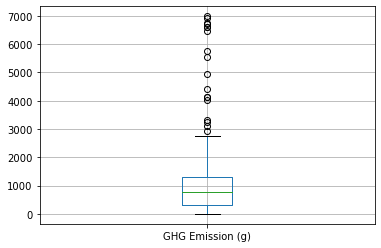

In [50]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

<AxesSubplot:>

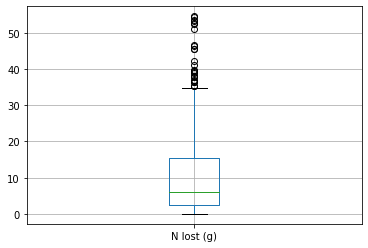

In [51]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<AxesSubplot:>

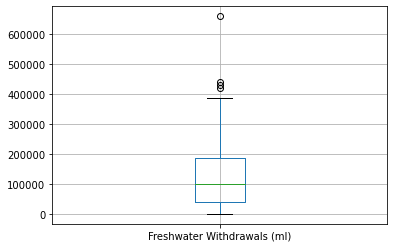

In [52]:
Products.boxplot(column=['Freshwater Withdrawals (ml)'], return_type='axes')

<AxesSubplot:>

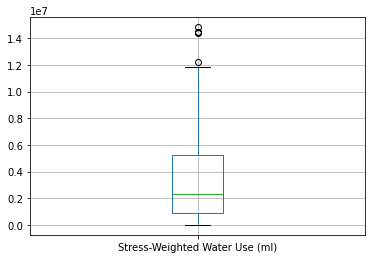

In [53]:
Products.boxplot(column=['Stress-Weighted Water Use (ml)'], return_type='axes')

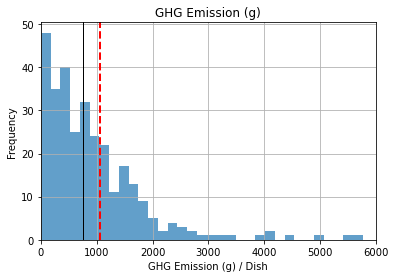

In [54]:
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim([0, 6000])
plt.savefig('GHGe_dish.png')

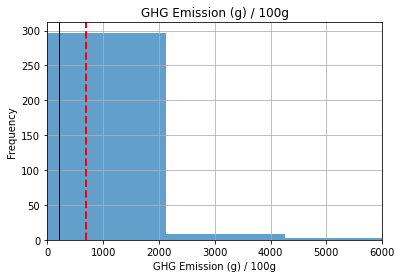

In [55]:
Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / 100g')
plt.ylabel('Frequency')
plt.xlim([0, 6000])
plt.savefig('GHGe_100g.png')

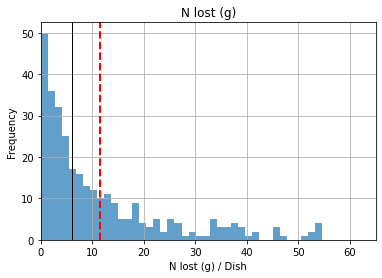

In [56]:
Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / Dish')
plt.ylabel('Frequency')
plt.xlim([0, 65])
plt.savefig('N lost_dish.png')

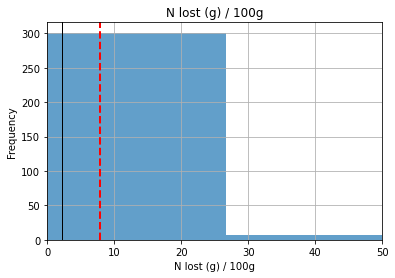

In [57]:
Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / 100g')
plt.ylabel('Frequency')
plt.xlim([0, 50])
plt.savefig('N lost_100g.png')